In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Preprocesamiento
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, RFE, SequentialFeatureSelector

# Modelos de clasificación
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Evaluación y validación
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.base import clone

In [77]:
df = pd.read_csv('../data/activity_data_Govea.csv')

In [78]:
df.shape

(600, 74)

In [79]:
df.isna().sum()
df.dropna(inplace=True)

In [80]:
x = df.iloc[:, 1:].values
y = df.iloc[:, 0].values.astype(int)

In [ ]:
modelos = {
    "SVM (lineal)": SVC(kernel='linear'),
    "SVM (RBF)": SVC(kernel='rbf'),
    "LDA": LinearDiscriminantAnalysis(),
    "K-NN": KNeighborsClassifier(n_neighbors=5),
    "MLgP (2 capas)": MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=5000),
    "Extra Trees": ExtraTreesClassifier(n_estimators=100),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Naive Bayes": GaussianNB()
}

In [82]:
# 5-fold cross-validation
n_splits=5
kf = StratifiedKFold(n_splits=n_splits, shuffle = True, random_state=42)

In [83]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [84]:
for nombre, modelo in modelos.items():
    cv_y_test = []
    cv_y_pred = []
    for train_index, test_index in kf.split(x, y):
# Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]
        clf_i = clone(modelo)
        clf_i.fit(x_train, y_train)
# Test phase
        x_test = x[test_index, :]
        y_test = y[test_index]
        y_pred = clf_i.predict(x_test)
        cv_y_test.append(y_test)
        cv_y_pred.append(y_pred)
    print(f"\n=== Modelo: {nombre} ===")
    print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))


=== Modelo: SVM (lineal) ===
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00       100
           3       0.99      1.00      1.00       100
           4       1.00      0.97      0.98       100
           5       0.94      0.97      0.96       100
           6       0.97      0.96      0.96       100

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600


=== Modelo: SVM (RBF) ===
              precision    recall  f1-score   support

           1       0.97      0.99      0.98       100
           2       1.00      0.97      0.98       100
           3       1.00      1.00      1.00       100
           4       1.00      0.99      0.99       100
           5       0.97      0.94      0.95       100
           6       0.95      1.00      0.98       100

    accuracy        

Exactitud es la accuracy, precisión por clase es precision, sensibilidad por clase es recall

Se escogió SVC radial y MLP, SVC cuenta con varios hiperparámteros entre los principales está C que controla la penalización por error, un valor más bajo penaliza menos, lo que nos da un modelo más simple con menos sobreajuste, una mayor C nos da un mayor ajuste a los datos.
MLP tiene también varios hiperparámteros, entre los principales están *hidden_layer_sizes* que define el número de capas ocultas y de neuronas por capas, *activation* nos da la función de activación que se usará, *solver* nos dice qué algoritmo de optimización se usará, *learning_rate*, la tasa de aprendizaje y *max_iter*, el número máximo de iteraciones para que converja.

In [85]:
# =========================
# SVM con diferentes valores de C
# =========================
svm_accuracies = []
C_values = [0.01, 0.1, 1, 10, 100, 1000]


for C in C_values:
    cv_y_test = []
    cv_y_pred = []
    for train_index, test_index in kf.split(x, y):
# Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]
        clf_i = SVC(kernel='rbf', C=C, gamma='scale')
        clf_i.fit(x_train, y_train)
# Test phase
        x_test = x[test_index, :]
        y_test = y[test_index]
        y_pred = clf_i.predict(x_test)
        cv_y_test.append(y_test)
        cv_y_pred.append(y_pred)
    print(f"\n=== Modelo: SVC Radial ===", f'con: {C} C')
    report = classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred), output_dict=True)
    accuracy = report['accuracy']
    svm_accuracies.append(accuracy)


=== Modelo: SVC Radial === con: 0.01 C

=== Modelo: SVC Radial === con: 0.1 C

=== Modelo: SVC Radial === con: 1 C

=== Modelo: SVC Radial === con: 10 C

=== Modelo: SVC Radial === con: 100 C

=== Modelo: SVC Radial === con: 1000 C


In [86]:
# =========================
# MLP con diferentes tamaños de capas ocultas
# =========================
mlp_accuracies = []
layer_configs = [(10,), (50,), (50, 30), (100, 50), (100, 100)]

for config in layer_configs:


    cv_y_test = []
    cv_y_pred = []
    for train_index, test_index in kf.split(x, y):
# Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]
        clf_i = MLPClassifier(hidden_layer_sizes=config, max_iter=500, random_state=42)
        clf_i.fit(x_train, y_train)
# Test phase
        x_test = x[test_index, :]
        y_test = y[test_index]
        y_pred = clf_i.predict(x_test)
        cv_y_test.append(y_test)
        cv_y_pred.append(y_pred)
    print(f"\n=== Modelo: MLPClassifier ===", f'con: {config} de layer_configs')
    report = classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred), output_dict=True)
    accuracy = report['accuracy']
    mlp_accuracies.append(accuracy)


=== Modelo: MLPClassifier === con: (10,) de layer_configs

=== Modelo: MLPClassifier === con: (50,) de layer_configs

=== Modelo: MLPClassifier === con: (50, 30) de layer_configs

=== Modelo: MLPClassifier === con: (100, 50) de layer_configs

=== Modelo: MLPClassifier === con: (100, 100) de layer_configs


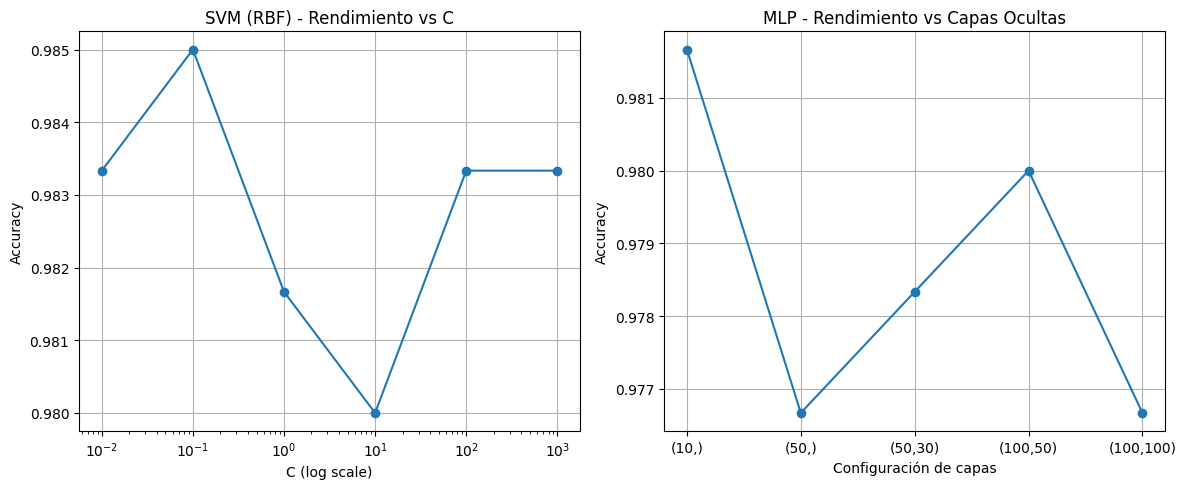

In [87]:
# Graficar resultados
plt.figure(figsize=(12, 5))

# Gráfica para SVM
plt.subplot(1, 2, 1)
plt.plot(C_values, svm_accuracies, marker='o')
plt.xscale('log')
plt.title('SVM (RBF) - Rendimiento vs C')
plt.xlabel('C (log scale)')
plt.ylabel('Accuracy')
plt.grid(True)

# Gráfica para MLP
plt.subplot(1, 2, 2)
labels = ['(10,)', '(50,)', '(50,30)', '(100,50)', '(100,100)']
plt.plot(labels, mlp_accuracies, marker='o')
plt.title('MLP - Rendimiento vs Capas Ocultas')
plt.xlabel('Configuración de capas')
plt.ylabel('Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()


In [66]:
# =========================
# SVM con diferentes valores de C y seleccion de caracteristicas
# =========================
k_values_kbest = [5, 10, 15, 20, 25, 30, 35, 39]
svc_kbest_accuracies = []



for k in k_values_kbest:


    cv_y_test = []
    cv_y_pred = []
    for train_index, test_index in kf.split(x, y):
# Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]
        clf_i = SVC(kernel='rbf', C=100, gamma='scale')
        fselection_cv = SelectKBest(score_func=f_classif, k=k)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)
        clf_i.fit(x_train, y_train)
# Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = clf_i.predict(x_test)
        cv_y_test.append(y_test)
        cv_y_pred.append(y_pred)
    print(f"\n=== Modelo: SVC Radial ===", f'con: {k} features')
    report = classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred), output_dict=True)
    accuracy = report['accuracy']
    svc_kbest_accuracies.append(accuracy)


=== Modelo: SVC Radial === con: 5 features

=== Modelo: SVC Radial === con: 10 features

=== Modelo: SVC Radial === con: 15 features

=== Modelo: SVC Radial === con: 20 features

=== Modelo: SVC Radial === con: 25 features

=== Modelo: SVC Radial === con: 30 features

=== Modelo: SVC Radial === con: 35 features

=== Modelo: SVC Radial === con: 39 features


In [67]:
# =========================
# MLP con diferentes tamaños de capas ocultas
# =========================
mlp_accuracies_kbest = []
k_values_kbest = [5, 10, 15, 20, 25, 30, 35, 39]



for k in k_values_kbest:


    cv_y_test = []
    cv_y_pred = []
    for train_index, test_index in kf.split(x, y):
# Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]
        clf_i = MLPClassifier(hidden_layer_sizes=(50, ), max_iter=500, random_state=42)
        fselection_cv = SelectKBest(score_func=f_classif, k=k)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)
        clf_i.fit(x_train, y_train)
# Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = clf_i.predict(x_test)
        cv_y_test.append(y_test)
        cv_y_pred.append(y_pred)
    print(f"\n=== Modelo: MLPClassifier ===", f'con: {k} de features')
    report = classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred), output_dict=True)
    accuracy = report['accuracy']
    mlp_accuracies_kbest.append(accuracy)

/Users/angelgovea/Library/CloudStorage/OneDrive-InstitutoTecnologicoydeEstudiosSuperioresdeMonterrey/4to Semestre/Modelacion del Aprendizaje con Inteligencia Artificial/proyecto1/proyecto1/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/angelgovea/Library/CloudStorage/OneDrive-InstitutoTecnologicoydeEstudiosSuperioresdeMonterrey/4to Semestre/Modelacion del Aprendizaje con Inteligencia Artificial/proyecto1/proyecto1/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/angelgovea/Library/CloudStorage/OneDrive-InstitutoTecnologicoydeEstudiosSuperioresdeMonterrey/4to Semestre/Modelacion del Aprendizaje con Inteligencia Artificial/proyecto1/proyect


=== Modelo: MLPClassifier === con: 5 de features


/Users/angelgovea/Library/CloudStorage/OneDrive-InstitutoTecnologicoydeEstudiosSuperioresdeMonterrey/4to Semestre/Modelacion del Aprendizaje con Inteligencia Artificial/proyecto1/proyecto1/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



=== Modelo: MLPClassifier === con: 10 de features


/Users/angelgovea/Library/CloudStorage/OneDrive-InstitutoTecnologicoydeEstudiosSuperioresdeMonterrey/4to Semestre/Modelacion del Aprendizaje con Inteligencia Artificial/proyecto1/proyecto1/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/angelgovea/Library/CloudStorage/OneDrive-InstitutoTecnologicoydeEstudiosSuperioresdeMonterrey/4to Semestre/Modelacion del Aprendizaje con Inteligencia Artificial/proyecto1/proyecto1/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



=== Modelo: MLPClassifier === con: 15 de features


/Users/angelgovea/Library/CloudStorage/OneDrive-InstitutoTecnologicoydeEstudiosSuperioresdeMonterrey/4to Semestre/Modelacion del Aprendizaje con Inteligencia Artificial/proyecto1/proyecto1/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/angelgovea/Library/CloudStorage/OneDrive-InstitutoTecnologicoydeEstudiosSuperioresdeMonterrey/4to Semestre/Modelacion del Aprendizaje con Inteligencia Artificial/proyecto1/proyecto1/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/angelgovea/Library/CloudStorage/OneDrive-InstitutoTecnologicoydeEstudiosSuperioresdeMonterrey/4to Semestre/Modelacion del Aprendizaje con Inteligencia Artificial/proyecto1/proyect


=== Modelo: MLPClassifier === con: 20 de features


/Users/angelgovea/Library/CloudStorage/OneDrive-InstitutoTecnologicoydeEstudiosSuperioresdeMonterrey/4to Semestre/Modelacion del Aprendizaje con Inteligencia Artificial/proyecto1/proyecto1/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/angelgovea/Library/CloudStorage/OneDrive-InstitutoTecnologicoydeEstudiosSuperioresdeMonterrey/4to Semestre/Modelacion del Aprendizaje con Inteligencia Artificial/proyecto1/proyecto1/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/angelgovea/Library/CloudStorage/OneDrive-InstitutoTecnologicoydeEstudiosSuperioresdeMonterrey/4to Semestre/Modelacion del Aprendizaje con Inteligencia Artificial/proyecto1/proyect


=== Modelo: MLPClassifier === con: 25 de features

=== Modelo: MLPClassifier === con: 30 de features


/Users/angelgovea/Library/CloudStorage/OneDrive-InstitutoTecnologicoydeEstudiosSuperioresdeMonterrey/4to Semestre/Modelacion del Aprendizaje con Inteligencia Artificial/proyecto1/proyecto1/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/angelgovea/Library/CloudStorage/OneDrive-InstitutoTecnologicoydeEstudiosSuperioresdeMonterrey/4to Semestre/Modelacion del Aprendizaje con Inteligencia Artificial/proyecto1/proyecto1/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/angelgovea/Library/CloudStorage/OneDrive-InstitutoTecnologicoydeEstudiosSuperioresdeMonterrey/4to Semestre/Modelacion del Aprendizaje con Inteligencia Artificial/proyecto1/proyect


=== Modelo: MLPClassifier === con: 35 de features


/Users/angelgovea/Library/CloudStorage/OneDrive-InstitutoTecnologicoydeEstudiosSuperioresdeMonterrey/4to Semestre/Modelacion del Aprendizaje con Inteligencia Artificial/proyecto1/proyecto1/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/angelgovea/Library/CloudStorage/OneDrive-InstitutoTecnologicoydeEstudiosSuperioresdeMonterrey/4to Semestre/Modelacion del Aprendizaje con Inteligencia Artificial/proyecto1/proyecto1/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(



=== Modelo: MLPClassifier === con: 39 de features


In [68]:
best_k_index = np.argmax(mlp_accuracies_kbest)
best_k = k_values_kbest[best_k_index]
best_accuracy = mlp_accuracies_kbest[best_k_index]

print(f"Mejor k de MLP: {best_k} con accuracy de: {best_accuracy:.4f}")

Mejor k de MLP: 30 con accuracy de: 0.9867


In [75]:
selector = SelectKBest(score_func=f_classif, k=10)
selector.fit(x, y)

# Obtener índices de las características seleccionadas
selected_indices = selector.get_support(indices=True)


feature_names = df.columns[1:]  # porque la columna 0 es la etiqueta
selected_features = feature_names[selected_indices]


print("Nombres de las mejores características para MLPClassifier:", selected_features.tolist())

Nombres de las mejores características para MLPClassifier: ['1', '2', '8', '9', '57', '63', '67', '68', '70', '73']


In [70]:
best_k_index = np.argmax(svc_kbest_accuracies)
best_k = k_values_kbest[best_k_index]
best_accuracy = svc_kbest_accuracies[best_k_index]

print(f"Mejor k de SVC: {best_k} con accuracy de: {best_accuracy:.4f}")


Mejor k de SVC: 30 con accuracy de: 0.9967


En el caso de SVC radial, su mejor rendimiento lo obtuvo con todas las características disponibles

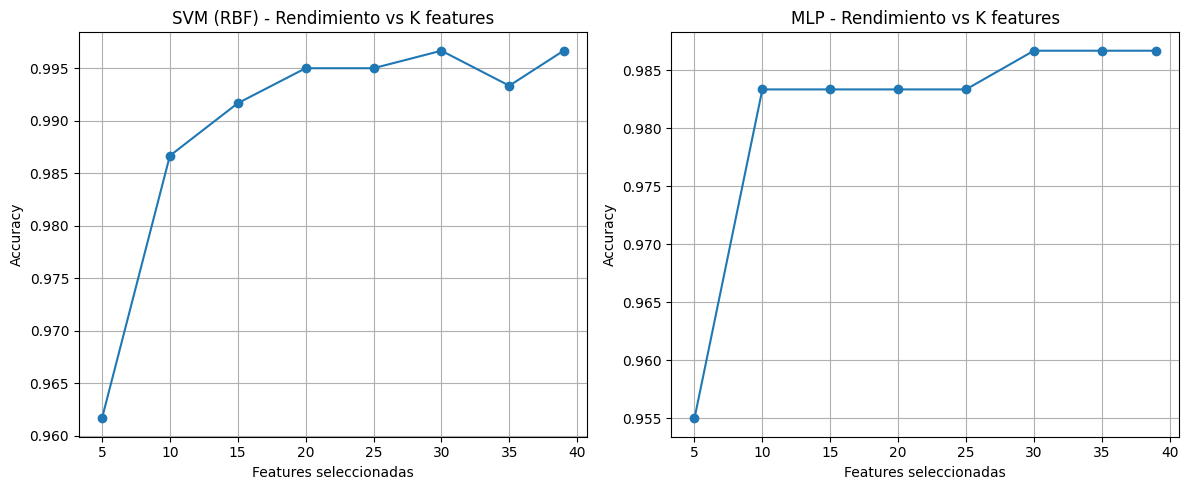

In [71]:
# Graficar resultados
plt.figure(figsize=(12, 5))

# Gráfica para SVM
plt.subplot(1, 2, 1)
plt.plot(k_values_kbest, svc_kbest_accuracies, marker='o')
plt.title('SVM (RBF) - Rendimiento vs K features')
plt.xlabel('Features seleccionadas')
plt.ylabel('Accuracy')
plt.grid(True)

# Gráfica para MLP
plt.subplot(1, 2, 2)

plt.plot(k_values_kbest, mlp_accuracies_kbest, marker='o')
plt.title('MLP - Rendimiento vs K features')
plt.xlabel('Features seleccionadas')
plt.ylabel('Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()

Con estas gráficas se demuestra que no necesitamos de todas las features para poder tener las mejores predicciones y a la vez optimizamos recursos, aunque el mejor desempeño de SVC fue en 39, podemos utilizar 35 sin ver una gran penalización, en el caso de MLPClassifier su mejore desempeño estuvo en 30 features.

***PipeLine Optimizado SVM***


In [74]:
# Definir pipeline
pipeline_mlp = Pipeline([
    ("scaler", StandardScaler()),
    ("selector", SelectKBest(score_func=f_classif, k=10)),
    ("classifier", MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, random_state=42))
])

# Validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipeline_mlp, x, y, cv=cv, scoring='accuracy')

# Resultados
print("Accuracy por fold:", scores)
print(f"Accuracy promedio: {scores.mean():.4f} ± {scores.std():.4f}")

/Users/angelgovea/Library/CloudStorage/OneDrive-InstitutoTecnologicoydeEstudiosSuperioresdeMonterrey/4to Semestre/Modelacion del Aprendizaje con Inteligencia Artificial/proyecto1/proyecto1/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy por fold: [1.         0.98333333 0.975      0.96666667 0.99166667]
Accuracy promedio: 0.9833 ± 0.0118


/Users/angelgovea/Library/CloudStorage/OneDrive-InstitutoTecnologicoydeEstudiosSuperioresdeMonterrey/4to Semestre/Modelacion del Aprendizaje con Inteligencia Artificial/proyecto1/proyecto1/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
